**About Dataset**

This dataset contains images of various fish species for a classification problem. The images are provided in `.png` format and are organized into folders by species. The dataset was sourced from the following 

Kaggle link: (https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset/data)

**Features:**
For each image, we will consider the following attributes:

- **Image Path**: The file path of the image.
- **Label**: The species of the fish depicted in the image (used as the target variable for classification).

**Dataset Structure:**
The images are divided into separate folders by species. Each folder represents a fish species, and the images within that folder correspond to that species.

This project aims to classify fish species based on image data using a deep learning model.

** **

**Importing the libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

**Dataset Loading and Visualization**

In this step, we will load images containing different fish species from their respective folders. Each folder represents a specific fish species. We will create a Pandas DataFrame containing the image paths and labels.

Then, we will visualize a sample image from the dataset to observe its structure.

In [2]:
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 
classes = [i for i in os.listdir(fish_dir) if '.' not in i]                    
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

Create lists to store the labels and paths of the images.

In [3]:
label = []
path = []

for dir_name, _,filenames in os.walk(fish_dir):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dir_name.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dir_name)[-1])         # Append the directory name to label 
                path.append(os.path.join(dir_name,filename))     # Append all the png files to path of that directory

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label

**Basic Information and Visualization**

Display the first few rows of our dataset to understand its structure.

Check for any missing values and visualize the distribution of classes.

In [4]:
print(data.head())
print(data.info())
print(data['label'].value_counts())

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB
None
label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64


Visualize some sample images from the dataset to get an overview of what we are working with.

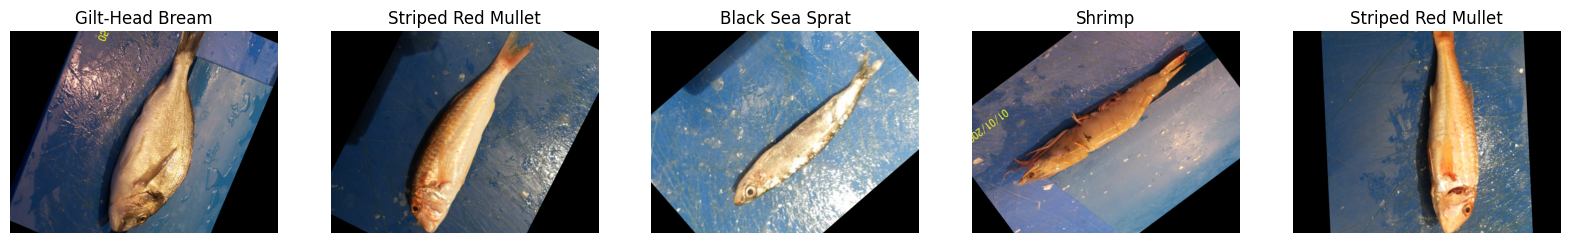

In [12]:
def plot_sample_images(data, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i in range(num_samples):
        sample = data.sample().iloc[0]
        img = load_img(sample['path'])
        axes[i].imshow(img)
        axes[i].set_title(sample['label'])
        axes[i].axis('off')
    plt.show()

plot_sample_images(data)

**Model Training**

Split the dataset into training and testing sets and preprocess the images for model input.

Split the data into training and testing datasets using an 70-30 split ratio.

In [14]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['label'])

**Function to load and preprocess images**

Define a function to load images from their paths and preprocess them by resizing and normalizing the pixel values.

In [15]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalize pixel values

**Prepare X and y**

Prepare our feature set (X) and labels (y) for both training and testing datasets. The labels will be one-hot encoded for categorical classification.

In [16]:
# Prepare X_train and y_train
X_train = np.array([load_and_preprocess_image(path) for path in train_data['path']])
y_train = pd.get_dummies(train_data['label']).values

# Prepare X_test and y_test
X_test = np.array([load_and_preprocess_image(path) for path in test_data['path']])
y_test = pd.get_dummies(test_data['label']).values

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6300, 224, 224, 3)
Test set shape: (2700, 224, 224, 3)


**Model Development**

Define, compile, and train our CNN model for fish classification.

**Define and Compile the Model**

Create a Sequential model using convolutional and pooling layers, followed by dense layers for classification.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Train the Model**

Train our model on the training dataset and validate it using a validation split from the training data.

In [18]:
history = model.fit(X_train, y_train, epochs=3, validation_split=0.3, batch_size=32)

Epoch 1/3
138/138 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.2163 - loss: 2.0929 - val_accuracy: 0.6418 - val_loss: 1.0299
Epoch 2/3
138/138 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.5642 - loss: 1.1772 - val_accuracy: 0.8122 - val_loss: 0.6169
Epoch 3/3
138/138 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.7123 - loss: 0.7885 - val_accuracy: 0.8444 - val_loss: 0.4877


**Model Evaluation**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Evaluate the model on the test set

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 411ms/step - accuracy: 0.8337 - loss: 0.4933
Test accuracy: 0.8474


**Plot training history**

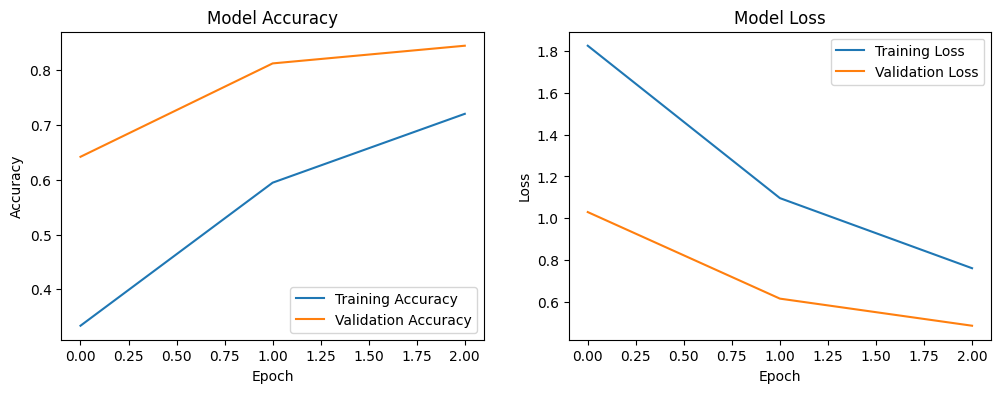

In [21]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Generate Predictions**

In [22]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 412ms/step


**Classification report**

In [23]:
print(classification_report(y_true_classes, y_pred_classes, target_names=data['label'].unique()))

                    precision    recall  f1-score   support

   Hourse Mackerel       0.84      0.94      0.89       300
   Black Sea Sprat       0.96      0.71      0.81       300
          Sea Bass       0.89      0.89      0.89       300
        Red Mullet       0.72      0.99      0.83       300
             Trout       0.91      0.88      0.90       300
Striped Red Mullet       0.81      0.82      0.82       300
            Shrimp       0.86      0.74      0.79       300
   Gilt-Head Bream       0.79      0.77      0.78       300
     Red Sea Bream       0.93      0.89      0.91       300

          accuracy                           0.85      2700
         macro avg       0.86      0.85      0.85      2700
      weighted avg       0.86      0.85      0.85      2700



**Confusion matrix**

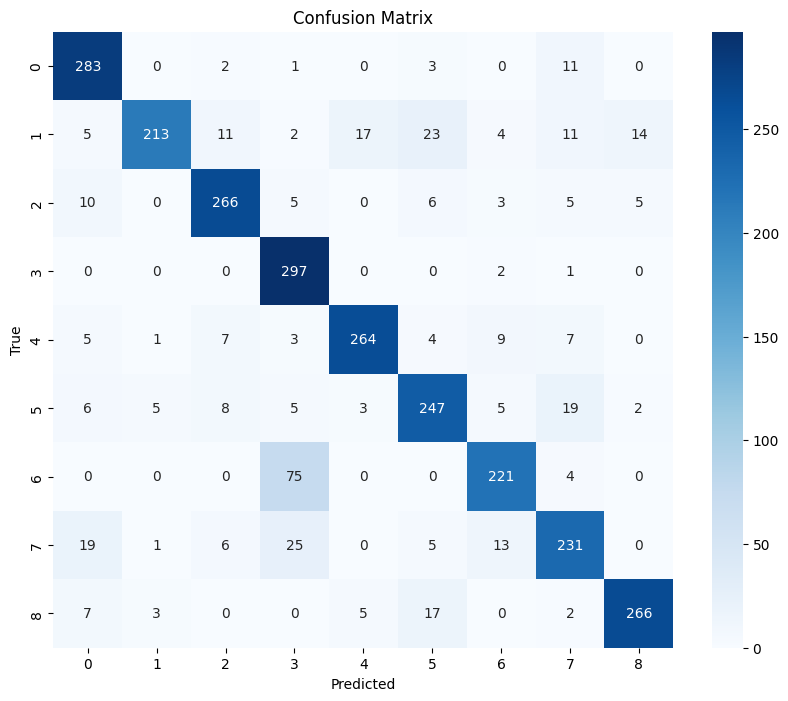

In [24]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Hyperparameter Optimization and Build model function**

In [25]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32),
                     (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(2, 2))
    
    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(Conv2D(hp.Int(f'conv{i+2}_units', min_value=32, max_value=128, step=32),
                         (3, 3), activation='relu'))
        model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())
    
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(hp.Int(f'dense{i+1}_units', min_value=32, max_value=256, step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float(f'dropout{i+1}', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

**Hyperparameter tuning**


In [27]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    directory='hyper_tuning',
    project_name='fish_classification'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=3, validation_split=0.3)

Trial 1 Complete [00h 38m 23s]
val_accuracy: 0.9005290865898132

Best val_accuracy So Far: 0.9005290865898132
Total elapsed time: 00h 38m 23s


**Get the best model and hyperparameters**

In [28]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters.values)

Best Hyperparameters:
{'conv1_units': 128, 'num_conv_layers': 2, 'conv2_units': 96, 'num_dense_layers': 1, 'dense1_units': 224, 'dropout1': 0.4, 'learning_rate': 0.00035808598204138133, 'conv3_units': 32}


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


**Evaluate the best model**

In [29]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best model test accuracy: {test_accuracy:.5f}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.8976 - loss: 0.3046
Best model test accuracy: 0.90333
